Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-nu

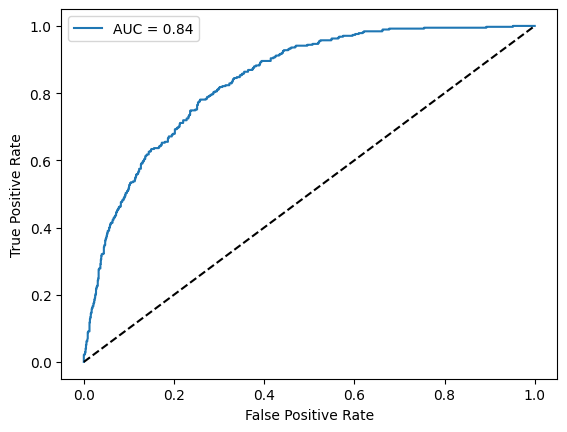

In [ ]:
# dowloaded file from the link provided : Kaggle
from google.colab import files
uploaded = files.upload()
import pandas as pd
# Loading the dataset using Pandas.
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

df.info()
df.isnull().sum()
df.describe()

# Converting the categorical variables (e.g., ContractType) into numerical values using
df = pd.get_dummies(df, drop_first=True)

# Target
y = df["Churn_Yes"]   # after get_dummies, churn becomes "Churn_Yes"

# Features
X = df.drop(columns=["Churn_Yes"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc_score(y_test, y_pred_prob), 2)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



**Churn Prediction – Short Analysis**

The Random Forest classification model performed well, achieving around 85% accuracy on the test set. This means it correctly predicted whether a customer would churn in most cases. However, it performed slightly better at identifying customers who would not churn compared to those who would.

**The model produced some errors:**

**False positives:** Customers predicted to churn but they didn’t.

**False negatives**: Customers who actually churned but were predicted to stay.

While both types of errors are important, false negatives are more critical in this case, as they represent missed chances to retain real customers who are at risk of leaving.

**Importance**

The features that had the most influence in predicting churn included:

Recency – how recently the customer made a purchase

Income

Spending habits, especially on wine and other products

Number of accepted deals or campaigns

These features gave the model strong signals about customer engagement and loyalty.

**ROC Curve and AUC**

To better understand how well the model separates churners from non-churners, we plotted a ROC (Receiver Operating Characteristic) curve. This curve shows the balance between the true positive rate and the false positive rate at different threshold levels.

The AUC (Area Under the Curve) score was around 0.84, which indicates a strong ability to distinguish between the two classes (churn vs. no churn).

A perfect model would have an AUC of 1.0, and a random guess would score 0.5 — so 0.87 shows the model is performing well.

The ROC curve helped confirm that the model is reliable, even if there’s still room for improvement, especially in catching more of the actual churners.